In [1]:
import sys
sys.path.append('../')

In [2]:
import sklearn as sk

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from icecream import ic

from radiousAngleMethod import radiousAngleMethod
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import make_blobs

#from numericalResults import correlationResults
from numericalResults import dataResults
from plotting import plot_data

import time

In [3]:
iris = sk.datasets.load_iris()
wine = sk.datasets.load_wine()
cancer = sk.datasets.load_breast_cancer()
diabetes = sk.datasets.load_diabetes()

In [4]:
pca = sk.decomposition.PCA(n_components=2)

In [5]:
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

In [6]:
pca.fit(wine.data)
wine_pca = pca.transform(wine.data)

In [7]:
pca.fit(cancer.data)
cancer_pca = pca.transform(cancer.data)

In [8]:
standard_scaler = sk.preprocessing.StandardScaler()

iris_standard = standard_scaler.fit_transform(iris_pca)
wine_standard = standard_scaler.fit_transform(wine_pca)
cancer_standard = standard_scaler.fit_transform(cancer_pca)

In [9]:
cancer_data_default = cancer
cancer_data = pca.fit_transform(cancer_data_default.data)
cancer_data = standard_scaler.fit_transform(cancer_data)

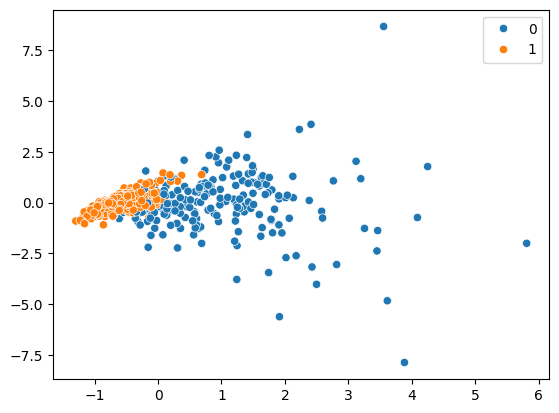

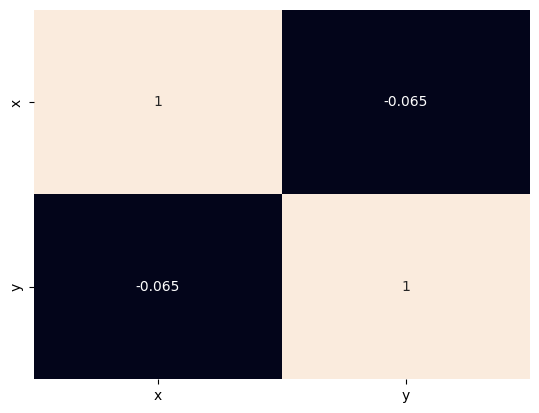

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.06485154139205565), pvalue=np.float64(0.34739220025415146))
ic| pearson_cov: PearsonRResult(statistic=np.float64(9.710982018518166e-15), pvalue=np.float64(0.9999999999998154))
    variance: np.float64(1.0000000000000095)
    desc:             Default
          count  5.690000e+02
          mean  -5.931596e-17
          std    1.000880e+00
          min   -3.002046e+00
          25%   -6.120741e-01
          50%   -1.825806e-01
          75%    3.653325e-01
          max    8.717002e+00


---------------------------------------------------------------------------------------------------------------


(PearsonRResult(statistic=np.float64(9.710982018518166e-15), pvalue=np.float64(0.9999999999998154)),
 np.float64(1.0000000000000095),
             Default
 count  5.690000e+02
 mean  -5.931596e-17
 std    1.000880e+00
 min   -3.002046e+00
 25%   -6.120741e-01
 50%   -1.825806e-01
 75%    3.653325e-01
 max    8.717002e+00)

In [10]:
sns.scatterplot(x=cancer_data[:, 0], y=cancer_data[:, 1], hue=cancer_data_default.target)
plt.show()

dataResults(cancer_standard, cancer_data_default.target, cancer_data_default.target, 'Default')

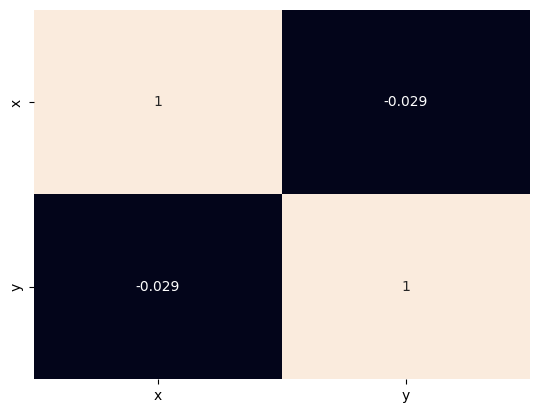

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.02882132241132511), pvalue=np.float64(0.5878186910287116))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.014469685720138865), pvalue=np.float64(0.6997094616946881))
    variance: np.float64(1.480459242779049)
    desc:                 RAM
          count  7.130000e+02
          mean  -1.993107e-17
          std    1.217595e+00
          min   -7.414510e+00
          25%   -4.684980e-01
          50%   -8.197782e-02
          75%    3.567674e-01
          max    8.959580e+00


---------------------------------------------------------------------------------------------------------------


In [11]:
#RAM
ram_data = cancer_data.copy()

cancer_RAM_x, cancer_RAM_y = radiousAngleMethod(ram_data, cancer_data_default.target, 7)

plot_data(cancer_data, cancer_data_default.target, cancer_RAM_x, cancer_RAM_y)

dataResults(cancer_RAM_x, cancer_RAM_y, cancer_data_default.target, 'RAM');

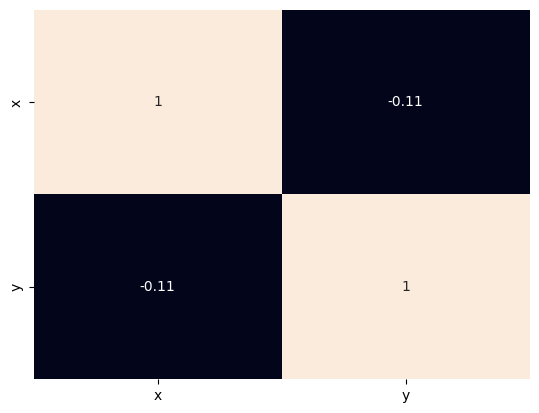

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.10951626656372218), pvalue=np.float64(0.03861965062377719))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.06796432239468272), pvalue=np.float64(0.06952749818620453))
    variance: np.float64(1.3169492262923717)
    desc:               SMOTE
          count  7.140000e+02
          mean  -6.468526e-17
          std    1.148389e+00
          min   -8.544632e+00
          25%   -2.570092e-01
          50%    3.169435e-01
          75%    5.691644e-01
          max    5.353305e+00


---------------------------------------------------------------------------------------------------------------


In [12]:
#SMOTE
smote_data = cancer_data.copy()

cancer_SMOTE_x, cancer_SMOTE_y = SMOTE().fit_resample(smote_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_SMOTE_x, cancer_SMOTE_y)

dataResults(cancer_SMOTE_x, cancer_SMOTE_y, cancer_data_default.target, 'SMOTE');

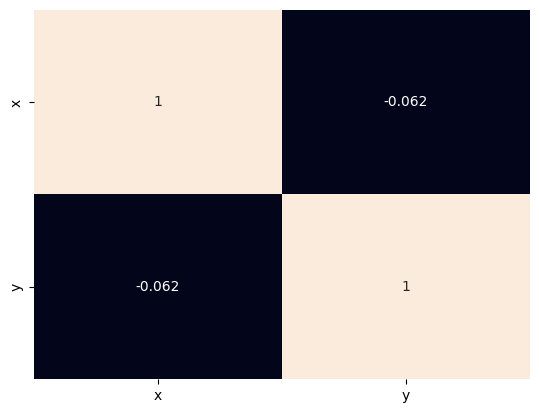

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.06226542798086929), pvalue=np.float64(0.24462243404797482))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.025853588391092162), pvalue=np.float64(0.49219710090645824))
    variance: np.float64(0.8951572213438558)
    desc:              ADASYN
          count  7.080000e+02
          mean  -5.017957e-17
          std    9.467964e-01
          min   -6.407041e+00
          25%   -4.918017e-01
          50%   -9.804376e-02
          75%    3.902249e-01
          max    9.287911e+00


---------------------------------------------------------------------------------------------------------------


In [13]:
#ADASYN
adasyn_data = cancer_data.copy()

cancer_ADASYN_x, cancer_ADASYN_y = ADASYN().fit_resample(adasyn_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ADASYN_x, cancer_ADASYN_y)

dataResults(cancer_ADASYN_x, cancer_ADASYN_y, cancer_data_default.target, 'ADASYN');

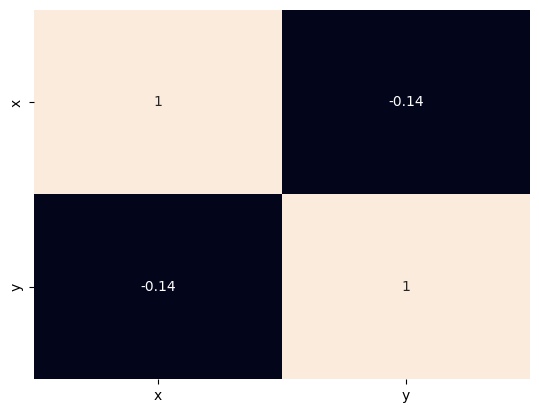

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.13748370718919567), pvalue=np.float64(0.009297146279321749))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.10092716053624592), pvalue=np.float64(0.006954364115306516))
    variance: np.float64(1.357752293786622)
    desc:                 ROS
          count  7.140000e+02
          mean  -2.985474e-17
          std    1.166043e+00
          min   -8.589806e+00
          25%   -2.299521e-01
          50%    2.757821e-01
          75%    5.667566e-01
          max    5.710937e+00


---------------------------------------------------------------------------------------------------------------


In [14]:
#random oversampling
ros = RandomOverSampler(random_state=0)
ros_data = cancer_data.copy()

cancer_ROS_x, cancer_ROS_y = ros.fit_resample(ros_data, cancer_data_default.target)

plot_data(cancer_data, cancer_data_default.target, cancer_ROS_x, cancer_ROS_y)

dataResults(cancer_ROS_x, cancer_ROS_y, cancer_data_default.target, 'ROS');

In [15]:
wine_data_default = wine
wine_data = pca.fit_transform(wine_data_default.data)
wine_data = standard_scaler.fit_transform(wine_data)

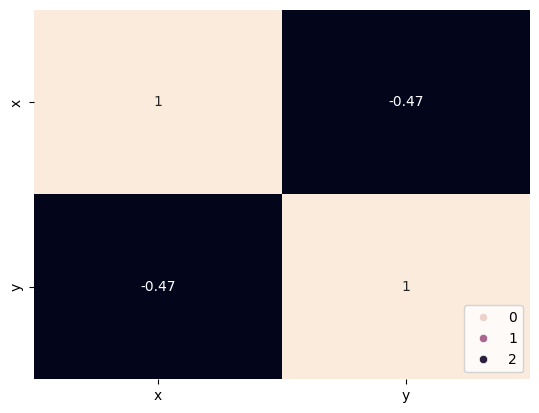

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4659212698004528), pvalue=np.float64(0.00020009691780459443))


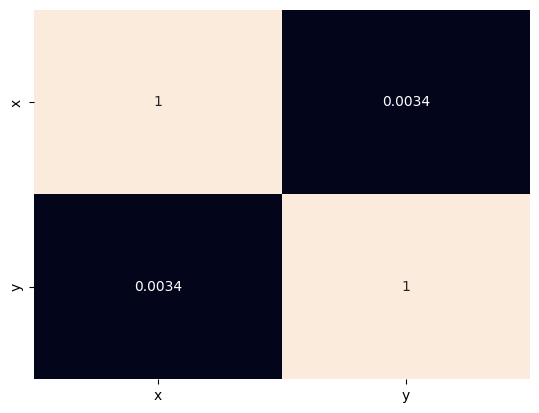

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.003442481609820476), pvalue=np.float64(0.9814735267061256))
ic| pearson_cov: PearsonRResult(statistic=np.float64(1.1379786002407855e-15), pvalue=np.float64(0.9999999999999879))
    variance: np.float64(1.0000000000000009)
    desc:           Default
          count  178.000000
          mean     0.000000
          std      1.002821
          min     -1.822000
          25%     -0.874863
          50%     -0.005306
          75%      0.575873
          max      3.744622


---------------------------------------------------------------------------------------------------------------


In [16]:
sns.scatterplot(x=wine_data[:, 0], y=wine_data[:, 1], hue=wine_data_default.target)
dataResults(wine_standard, wine_data_default.target, wine_data_default.target, 'Default');

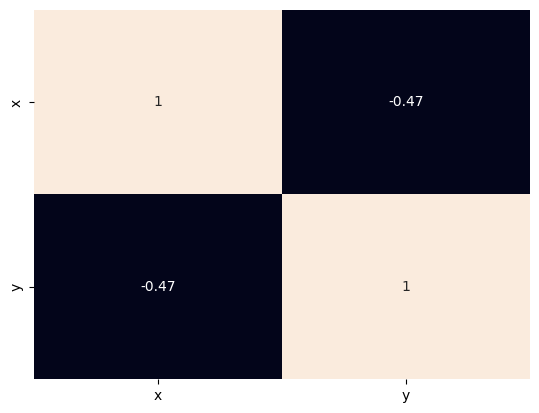

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4659212698004528), pvalue=np.float64(0.00020009691780459443))


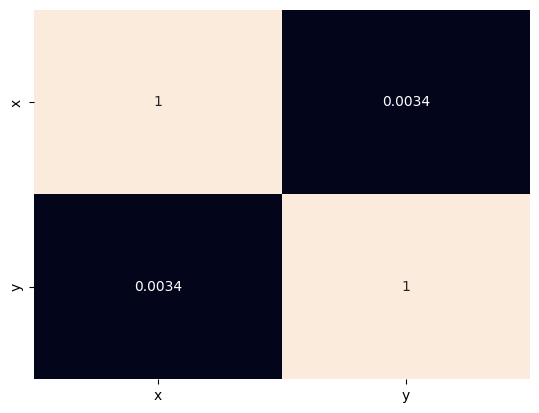

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.003442481609820476), pvalue=np.float64(0.9814735267061256))
ic| pearson_cov: PearsonRResult(statistic=np.float64(1.1379786002407855e-15), pvalue=np.float64(0.9999999999999879))
    variance: np.float64(1.0000000000000009)
    desc:           Default
          count  178.000000
          mean     0.000000
          std      1.002821
          min     -1.822000
          25%     -0.874863
          50%     -0.005306
          75%      0.575873
          max      3.744622


---------------------------------------------------------------------------------------------------------------


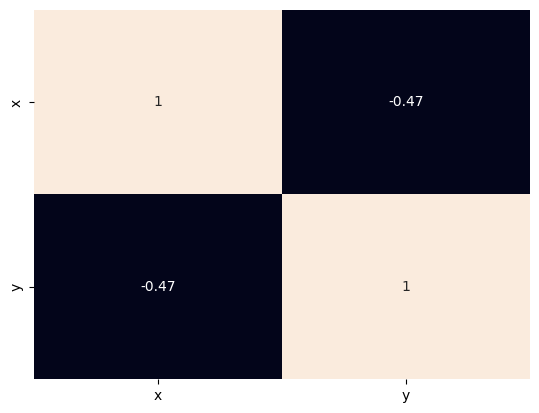

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4653725760017542), pvalue=np.float64(0.00017921431620213289))


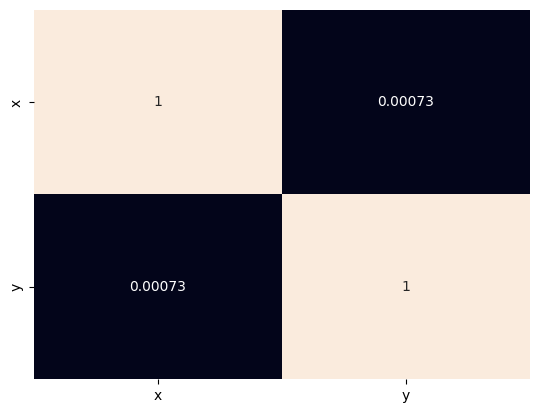

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.0007345864427016962), pvalue=np.float64(0.9955943139370664))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.0013969439714167711), pvalue=np.float64(0.9847386066760481))
    variance: np.float64(0.9651282511530613)
    desc:               RAM
          count  190.000000
          mean     0.000000
          std      0.985005
          min     -2.004138
          25%     -0.564783
          50%     -0.208368
          75%      0.468463
          max      4.200098


---------------------------------------------------------------------------------------------------------------


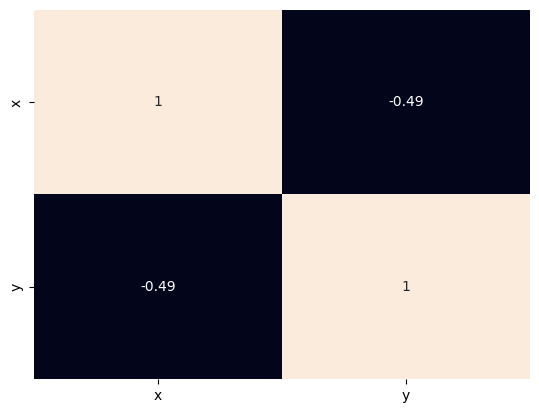

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4856727560983755), pvalue=np.float64(1.760843192947608e-05))


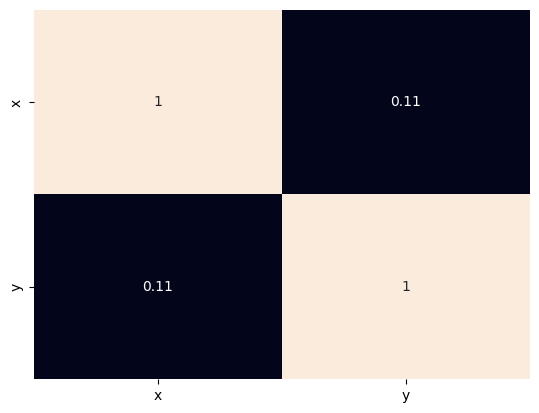

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.10906927090199972), pvalue=np.float64(0.3652395808868084))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.0034904737667816634), pvalue=np.float64(0.9596106537702608))
    variance: np.float64(0.9655630514238817)
    desc:             SMOTE
          count  213.000000
          mean     0.000000
          std      0.984945
          min     -2.103890
          25%     -0.643619
          50%     -0.213718
          75%      0.546440
          max      4.360702


---------------------------------------------------------------------------------------------------------------


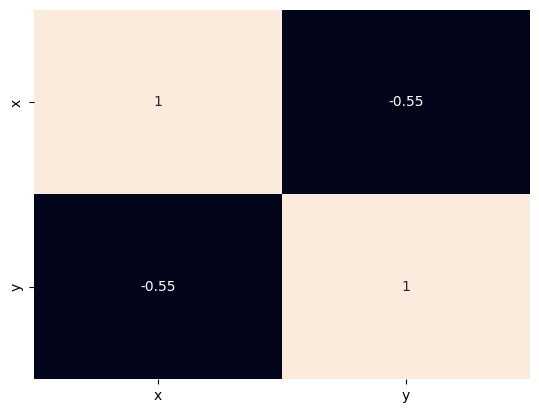

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.5487812388954953), pvalue=np.float64(4.987697621274923e-07))


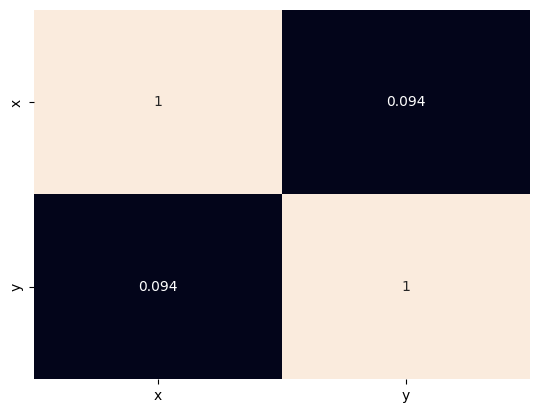

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.09370335540333842), pvalue=np.float64(0.4370076316166674))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.02353548373808631), pvalue=np.float64(0.7314978780322796))
    variance: np.float64(0.972866849118344)
    desc:              ADASYN
          count  2.150000e+02
          mean  -2.065531e-17
          std    9.886420e-01
          min   -2.181743e+00
          25%   -7.802521e-01
          50%   -1.700133e-01
          75%    4.699254e-01
          max    4.476747e+00


---------------------------------------------------------------------------------------------------------------


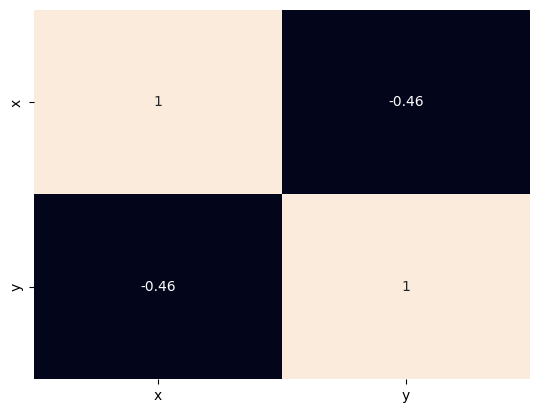

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.4597359971381199), pvalue=np.float64(5.499803843092303e-05))


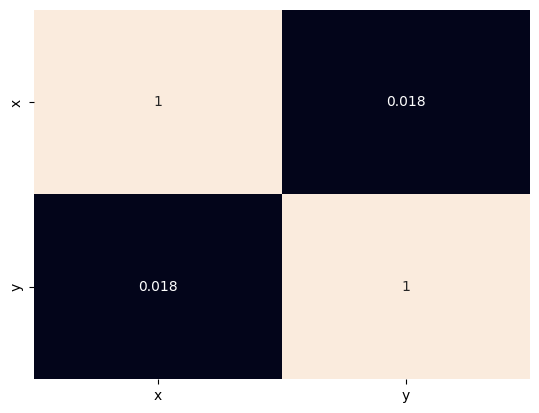

ic| unique_class: np.int64(2)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.01774444536919578), pvalue=np.float64(0.8832307246266641))
ic| pearson_cov: PearsonRResult(statistic=np.float64(-0.0006812652213301698), pvalue=np.float64(0.9921136522819708))
    variance: np.float64(0.9614187457614813)
    desc:                 ROS
          count  2.130000e+02
          mean   8.339703e-18
          std    9.828295e-01
          min   -2.108109e+00
          25%   -6.473481e-01
          50%   -1.950450e-01
          75%    4.392370e-01
          max    4.404158e+00


---------------------------------------------------------------------------------------------------------------


In [17]:
ram_data = wine_data.copy()
smote_data = wine_data.copy()
adasyn_data = wine_data.copy()
ros_data = wine_data.copy()

wine_RAM_x, wine_RAM_y = radiousAngleMethod(ram_data, wine_data_default.target, 7)

wine_SMOTE_x, wine_SMOTE_y = SMOTE().fit_resample(smote_data, wine_data_default.target)

wine_ADASYN_x, wine_ADASYN_y = ADASYN().fit_resample(adasyn_data, wine_data_default.target)

ros = RandomOverSampler(random_state=0)
wine_ROS_x, wine_ROS_y = ros.fit_resample(ros_data, wine_data_default.target)


plot_data(wine_data, wine_data_default.target, wine_RAM_x, wine_RAM_y)

dataResults(wine_standard, wine_data_default.target, wine_data_default.target, 'Default')
dataResults(wine_RAM_x, wine_RAM_y, wine_data_default.target, 'RAM')
dataResults(wine_SMOTE_x, wine_SMOTE_y, wine_data_default.target, 'SMOTE')
dataResults(wine_ADASYN_x, wine_ADASYN_y, wine_data_default.target, 'ADASYN')
dataResults(wine_ROS_x, wine_ROS_y, wine_data_default.target, 'ROS');

<Axes: >

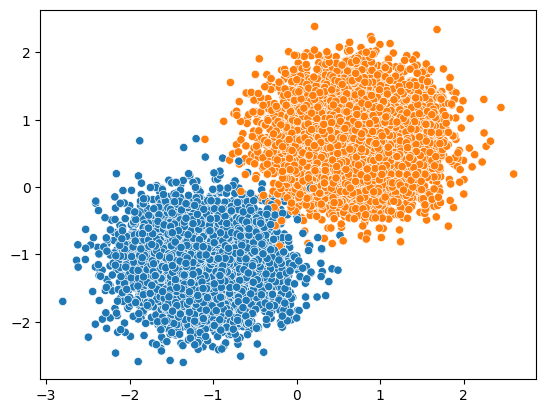

In [18]:
blob_data, blob_features = make_blobs(n_samples=[5000, 8000], centers=[[-2, -2], [2, 2]], n_features=2, random_state=1)

blob_data = standard_scaler.fit_transform(blob_data)

sns.scatterplot(x=blob_data[:, 0], y=blob_data[:, 1], hue=blob_features, legend=False)

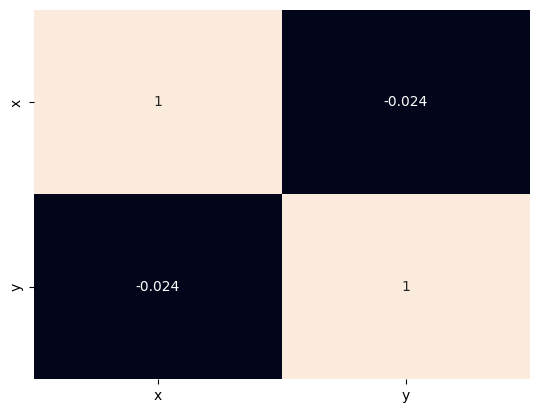

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.02400722350488151), pvalue=np.float64(0.08962347537344091))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7898423430815839), pvalue=np.float64(0.0))
    variance: np.float64(1.7898423430815824)
    desc:             Default
          count  1.300000e+04
          mean   2.295600e-17
          std    1.337901e+00
          min   -3.339159e+00
          25%   -1.425754e+00
          50%    5.881874e-01
          75%    1.101796e+00
          max    2.842029e+00


---------------------------------------------------------------------------------------------------------------


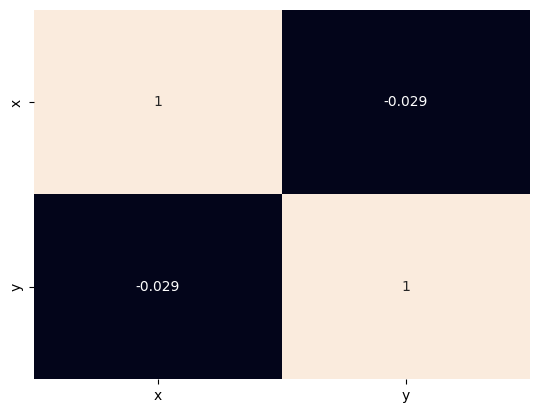

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.02901667750912743), pvalue=np.float64(0.009401629500112906))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7976601627709212), pvalue=np.float64(0.0))
    variance: np.float64(1.877401805633853)
    desc:                 RAM
          count  1.601000e+04
          mean  -1.704237e-16
          std    1.370226e+00
          min   -3.040077e+00
          25%   -1.294877e+00
          50%   -4.028053e-02
          75%    1.295468e+00
          max    3.141114e+00


---------------------------------------------------------------------------------------------------------------


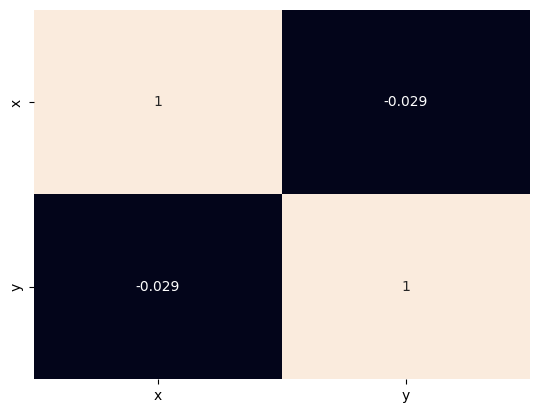

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.028573733401103345), pvalue=np.float64(0.010593337860877813))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7980620468005963), pvalue=np.float64(0.0))
    variance: np.float64(1.874642497751572)
    desc:               SMOTE
          count  1.600000e+04
          mean  -1.421085e-16
          std    1.369219e+00
          min   -3.041502e+00
          25%   -1.296519e+00
          50%   -3.571335e-02
          75%    1.293937e+00
          max    3.139976e+00


---------------------------------------------------------------------------------------------------------------


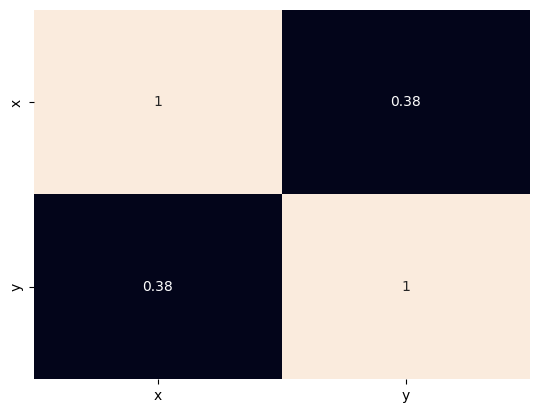

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(0.3800142543864363), pvalue=np.float64(1.1442718474252963e-273))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7520619950109303), pvalue=np.float64(0.0))
    variance: np.float64(1.4820027880011264)
    desc:              ADASYN
          count  1.601300e+04
          mean  -7.099659e-17
          std    1.217413e+00
          min   -3.264393e+00
          25%   -1.132605e+00
          50%    3.647608e-02
          75%    1.071102e+00
          max    2.916736e+00


---------------------------------------------------------------------------------------------------------------


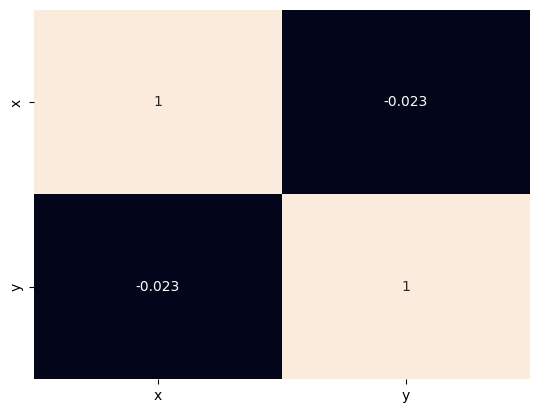

ic| unique_class: np.int64(0)
ic| sp.stats.pearsonr(dataframe['x'], dataframe['y']): PearsonRResult(statistic=np.float64(-0.023453746064919526), pvalue=np.float64(0.03592921979348855))
ic| pearson_cov: PearsonRResult(statistic=np.float64(0.7985110764617698), pvalue=np.float64(0.0))
    variance: np.float64(1.8799405790767532)
    desc:                 ROS
          count  1.600000e+04
          mean  -4.831691e-16
          std    1.371152e+00
          min   -3.039984e+00
          25%   -1.291505e+00
          50%   -2.013098e-02
          75%    1.295598e+00
          max    3.141347e+00


---------------------------------------------------------------------------------------------------------------


In [19]:
ram_data = blob_data.copy()
smote_data = blob_data.copy()
adasyn_data = blob_data.copy()
ros_data = blob_data.copy()

blob_RAM_x, blob_RAM_y = radiousAngleMethod(ram_data, blob_features, 7)

blob_SMOTE_x, blob_SMOTE_y = SMOTE().fit_resample(smote_data, blob_features)

blob_ADASYN_x, blob_ADASYN_y = ADASYN().fit_resample(adasyn_data, blob_features)

ros = RandomOverSampler(random_state=0)
blob_ROS_x, blob_ROS_y = ros.fit_resample(ros_data, blob_features)

dataResults(blob_data, blob_features, blob_features, 'Default')
dataResults(blob_RAM_x, blob_RAM_y, blob_features, 'RAM')
dataResults(blob_SMOTE_x, blob_SMOTE_y, blob_features, 'SMOTE')
dataResults(blob_ADASYN_x, blob_ADASYN_y, blob_features, 'ADASYN')
dataResults(blob_ROS_x, blob_ROS_y, blob_features, 'ROS');

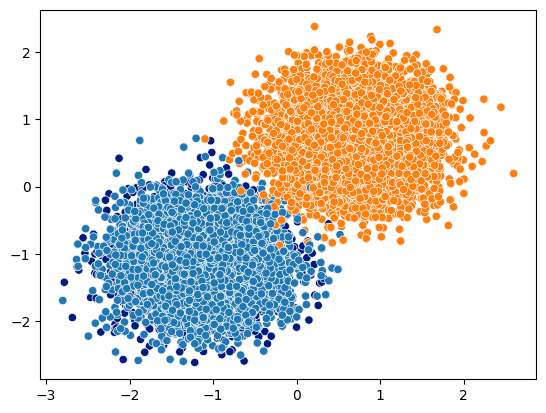

In [20]:
plot_data(blob_data, blob_features, blob_RAM_x, blob_RAM_y)

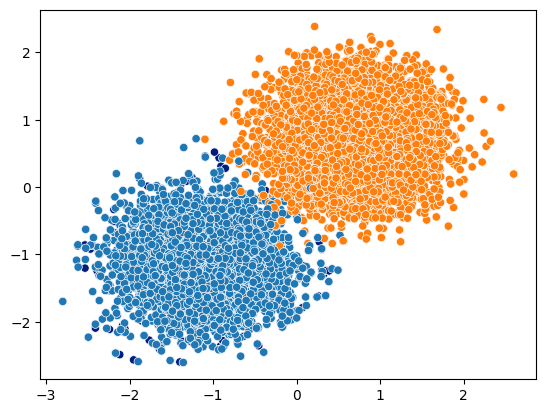

In [21]:
plot_data(blob_data, blob_features, blob_SMOTE_x, blob_SMOTE_y)

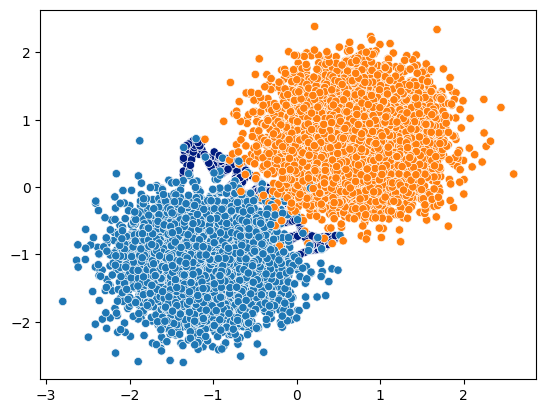

In [22]:
plot_data(blob_data, blob_features, blob_ADASYN_x, blob_ADASYN_y)

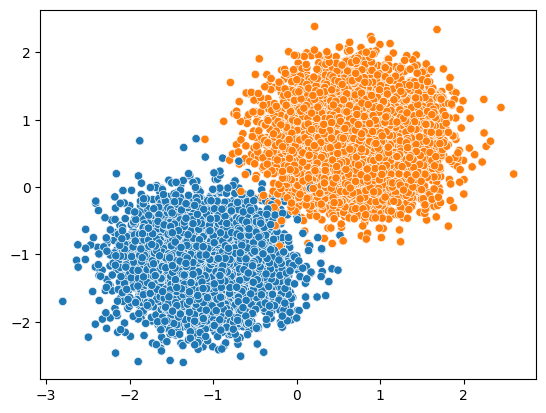

In [23]:
plot_data(blob_data, blob_features, blob_ROS_x, blob_ROS_y)

In [24]:
#correlationResults([cancer_standard,cancer_RAM_x, cancer_SMOTE_x, cancer_ADASYN_x, cancer_ROS_x], [cancer_data_default.target, cancer_RAM_y, cancer_SMOTE_y, cancer_ADASYN_y, cancer_ROS_y], default_dataset=cancer_standard, default_features=cancer_data_default.target)